## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage.filters
import scipy.stats


import shelfy.models.image_processing

/home/prestonh/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Spine detection

In [2]:
# Load image
shelf = 'insight_3'
file_directory = '/home/prestonh/Desktop/Programming/datasci/insight/projects/shelfy/shelfy/data/shelves/' + shelf + '/'
file_name = shelf + '.jpg'
file_path = file_directory + file_name
img = cv2.imread(file_path)


downsample 0


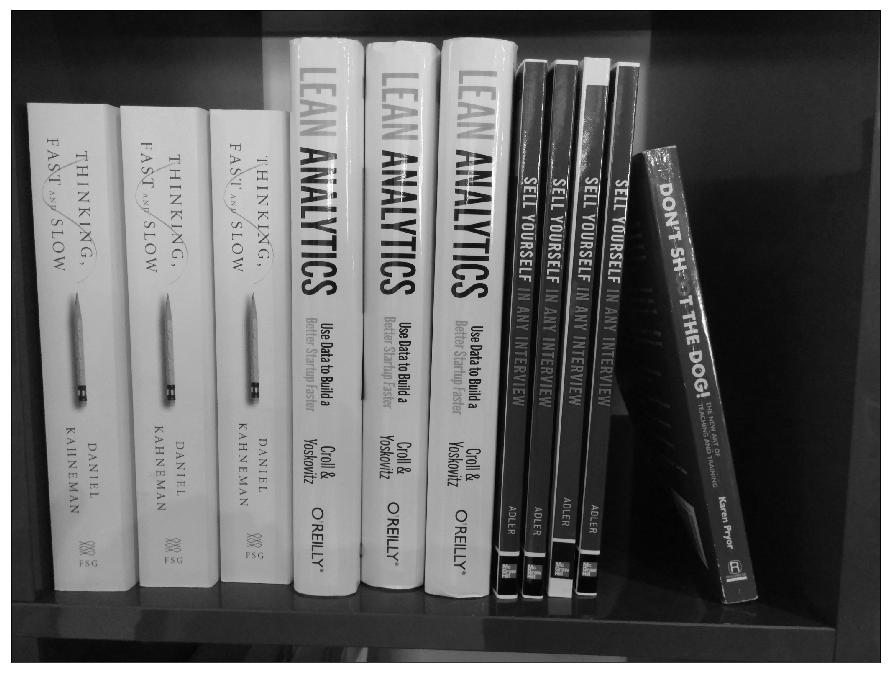

downsample 1


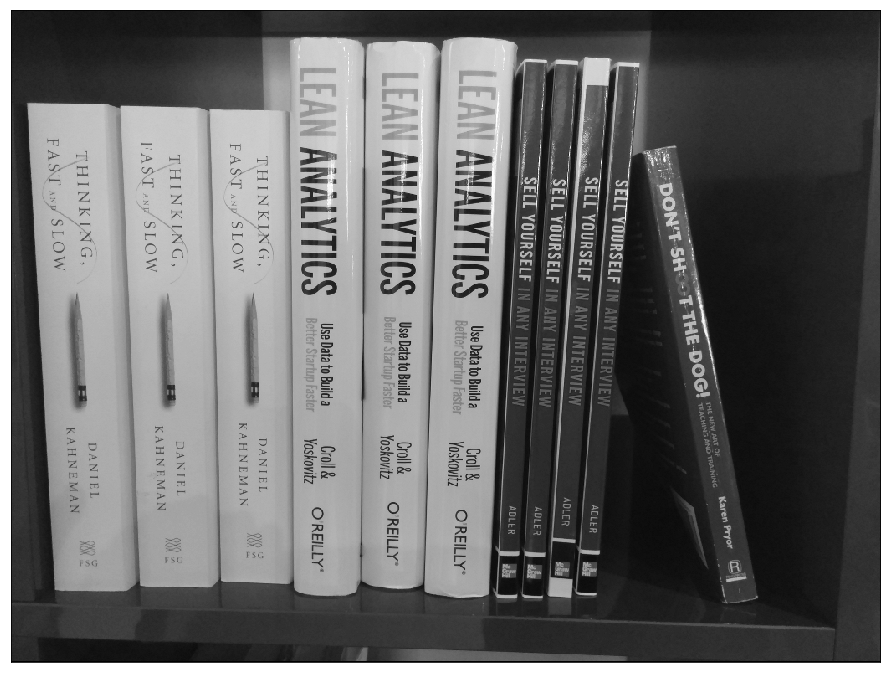

downsample 2


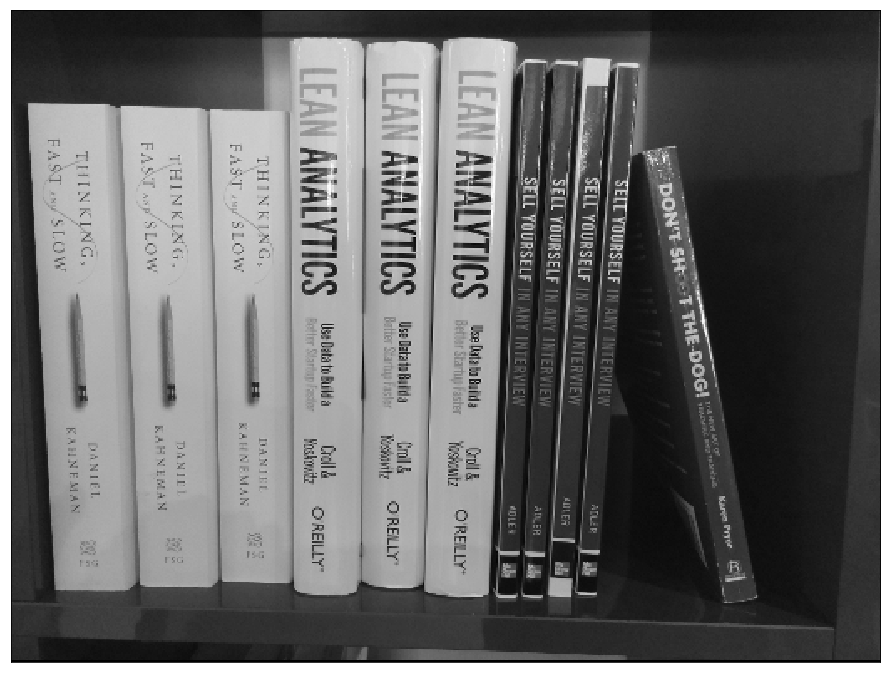

downsample 3


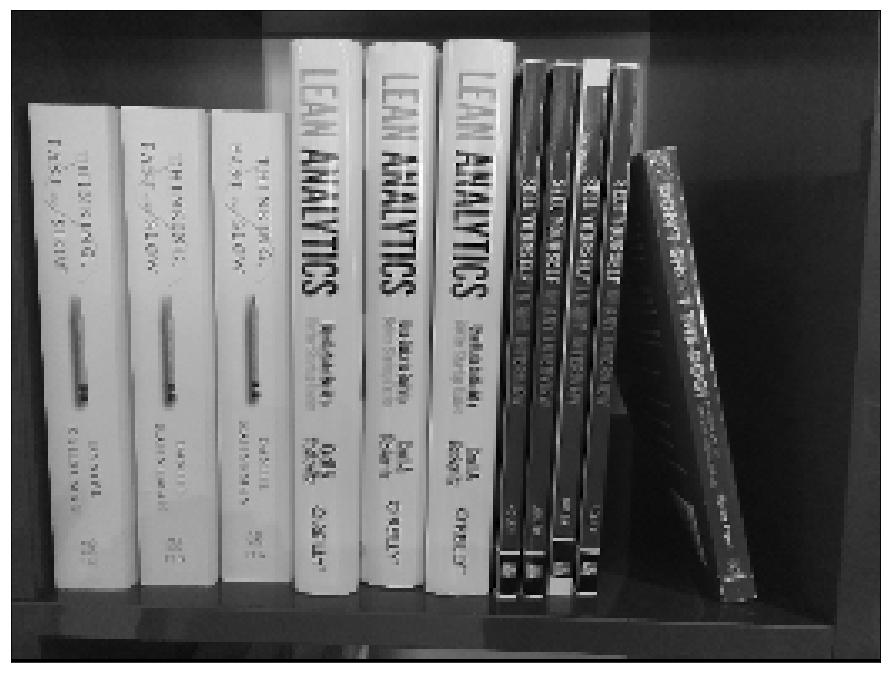

sobel x


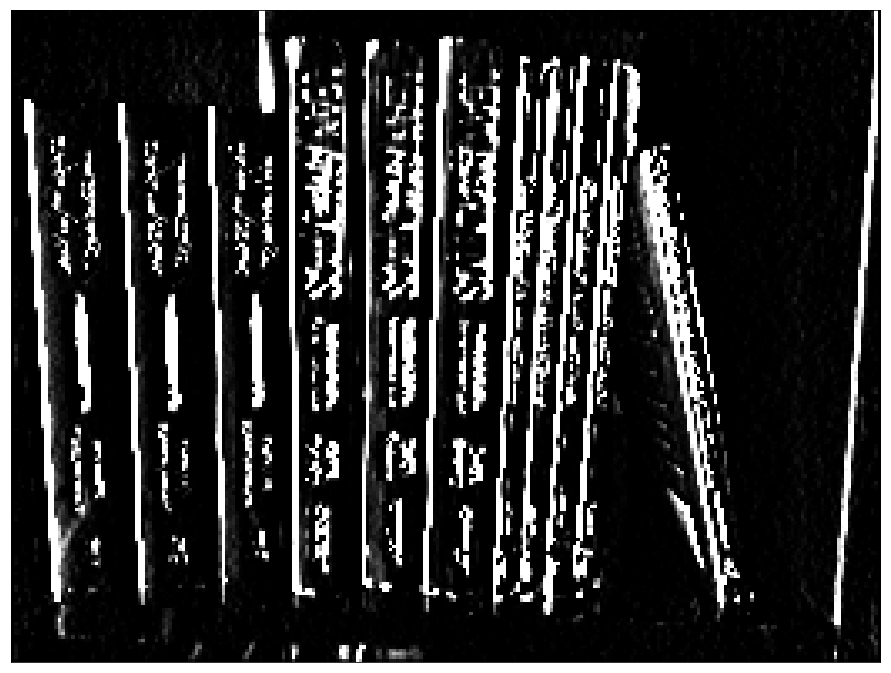

standardize


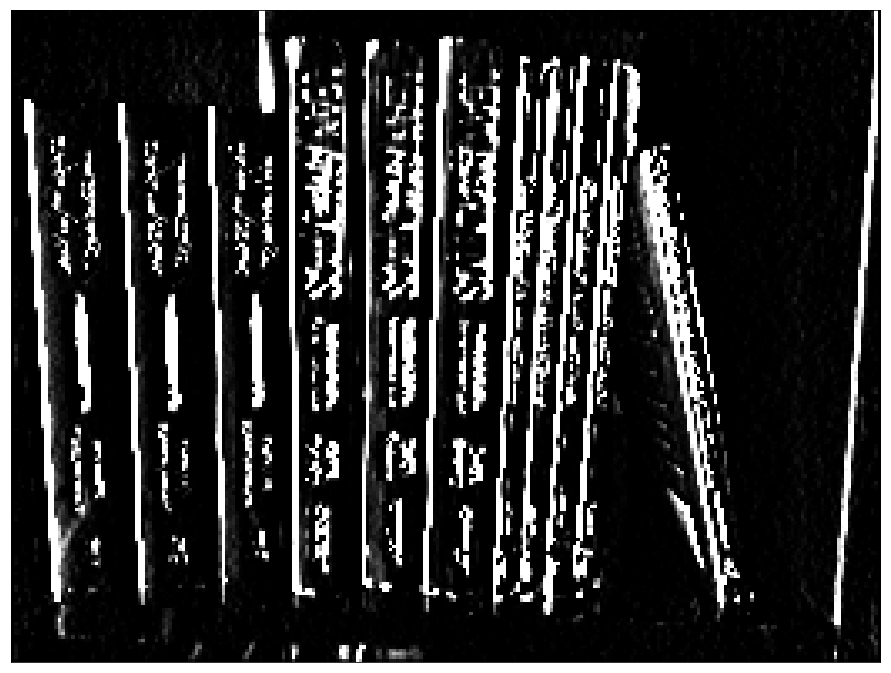

binarize


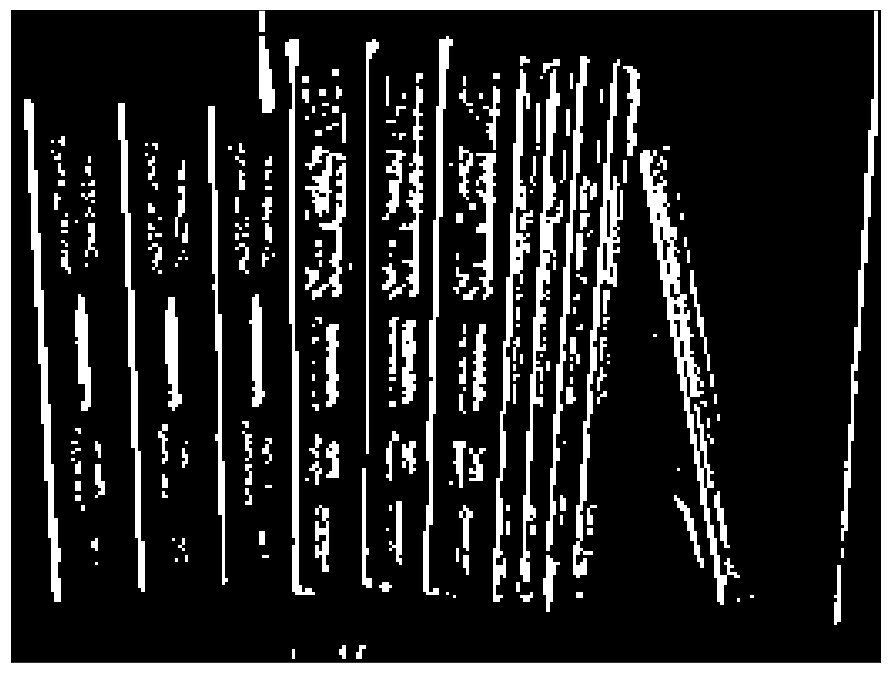

vertical erode


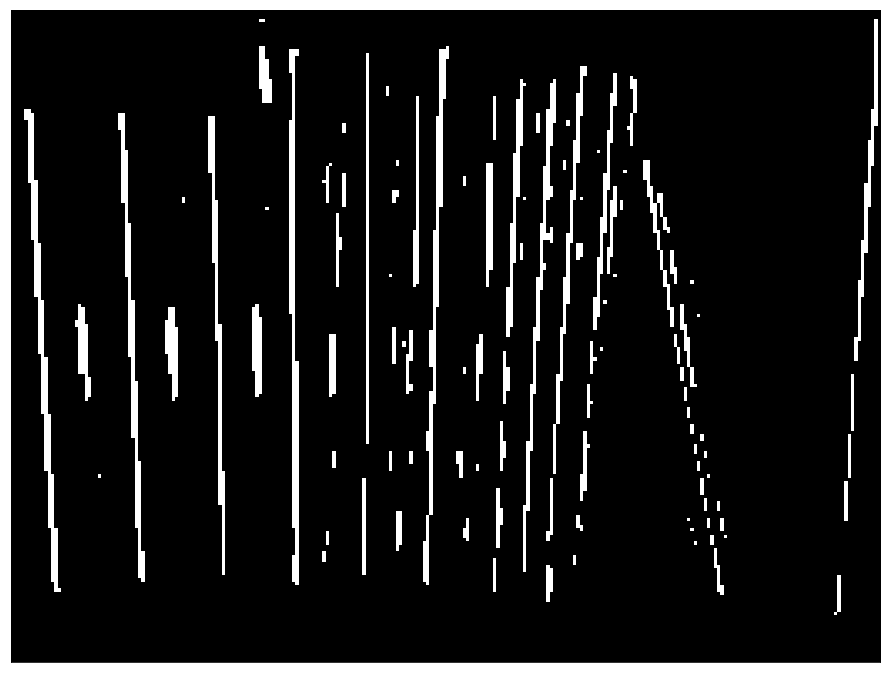

vertical dilate


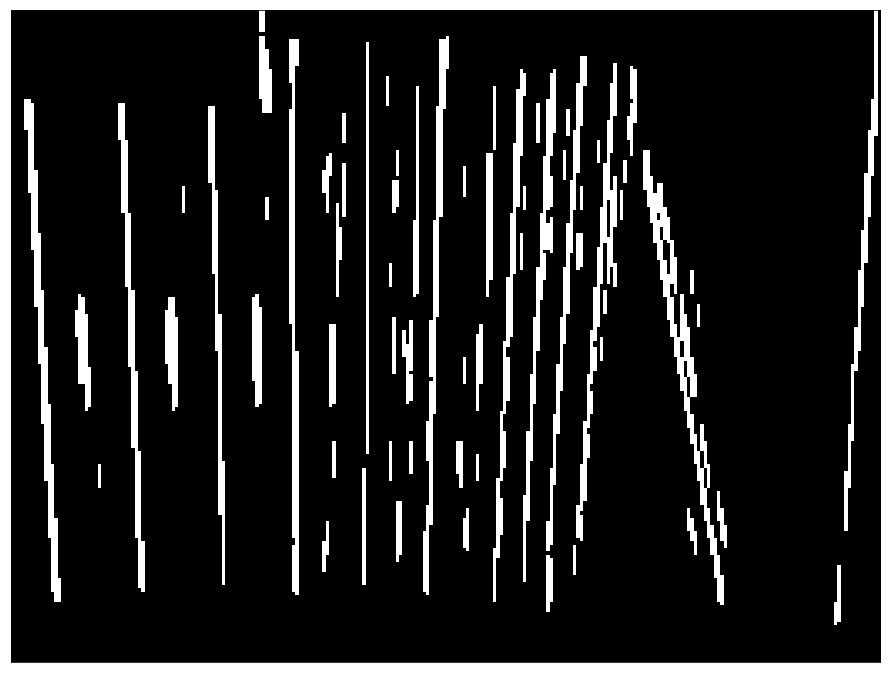

find connected components, levels =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


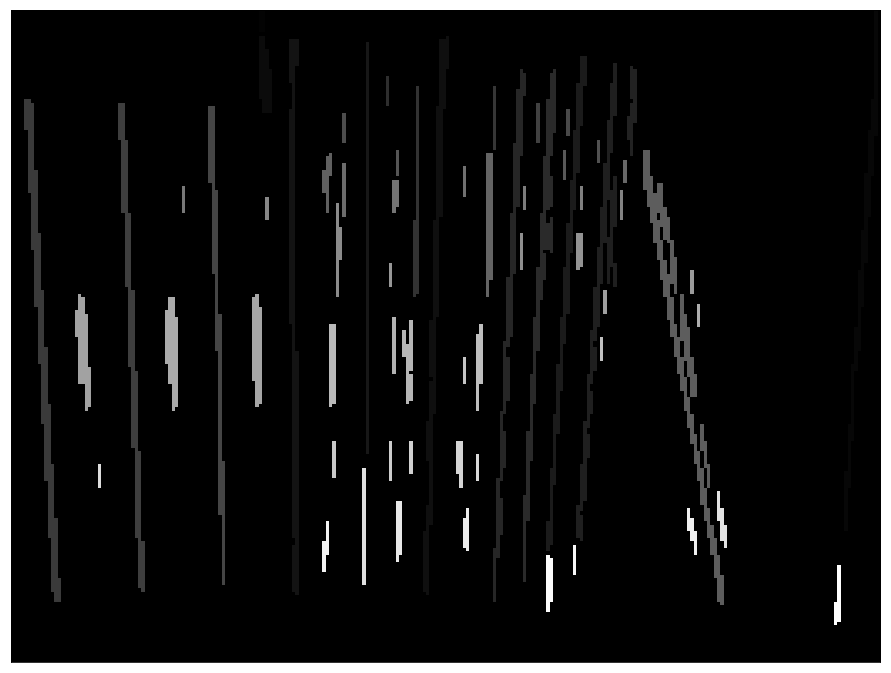

remove short clusters


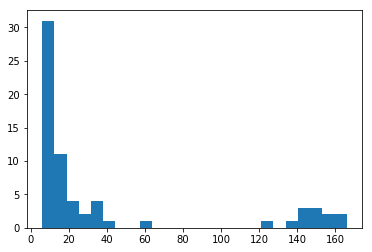

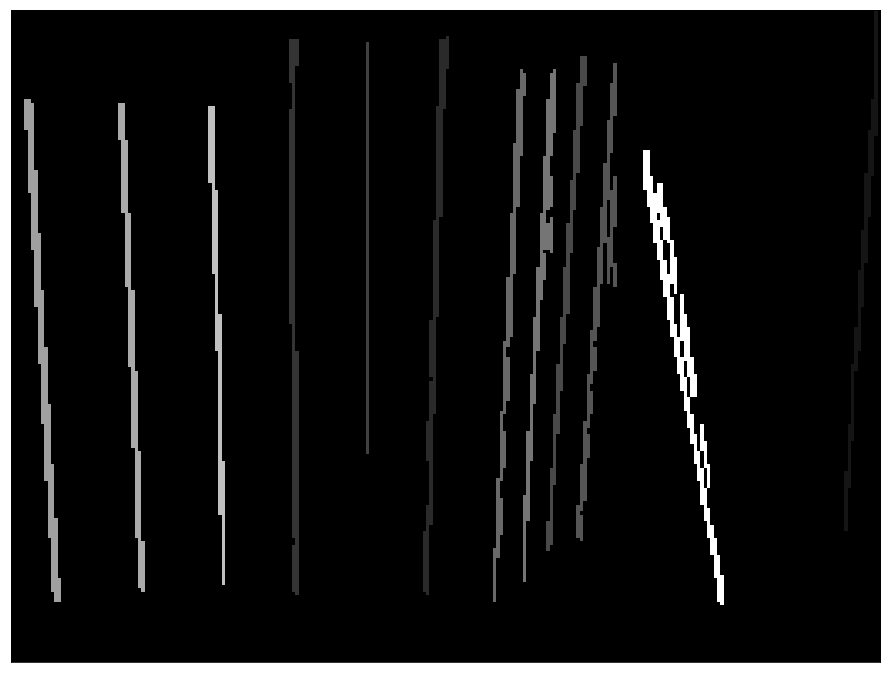

binarize


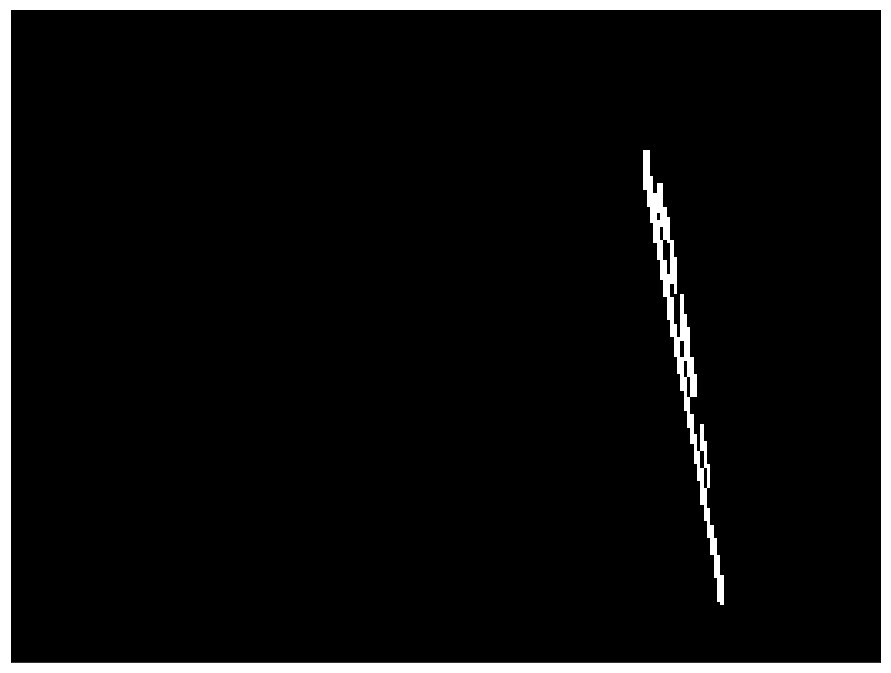

upsample


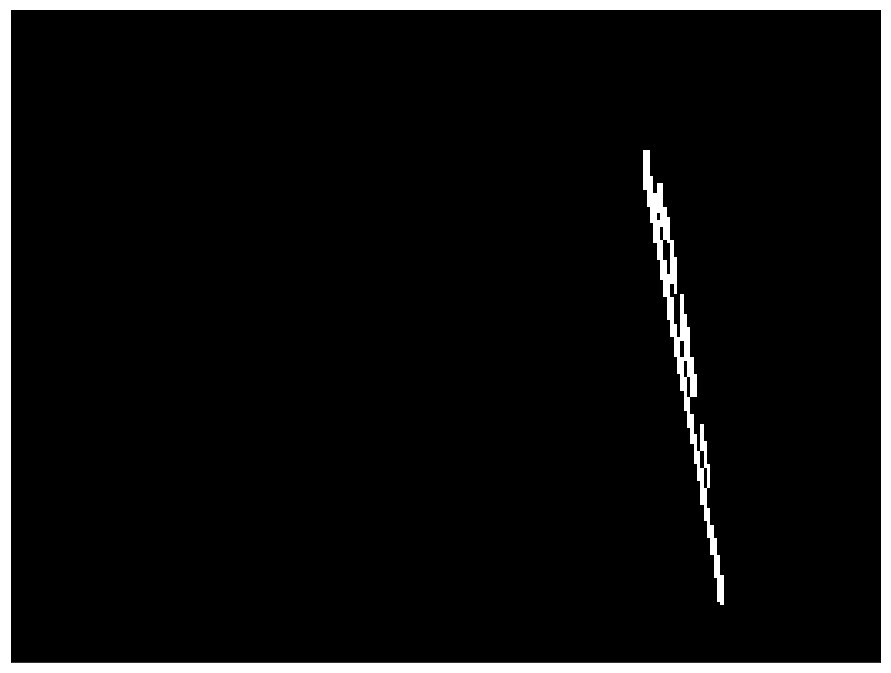

find connected components, levels =  [1]


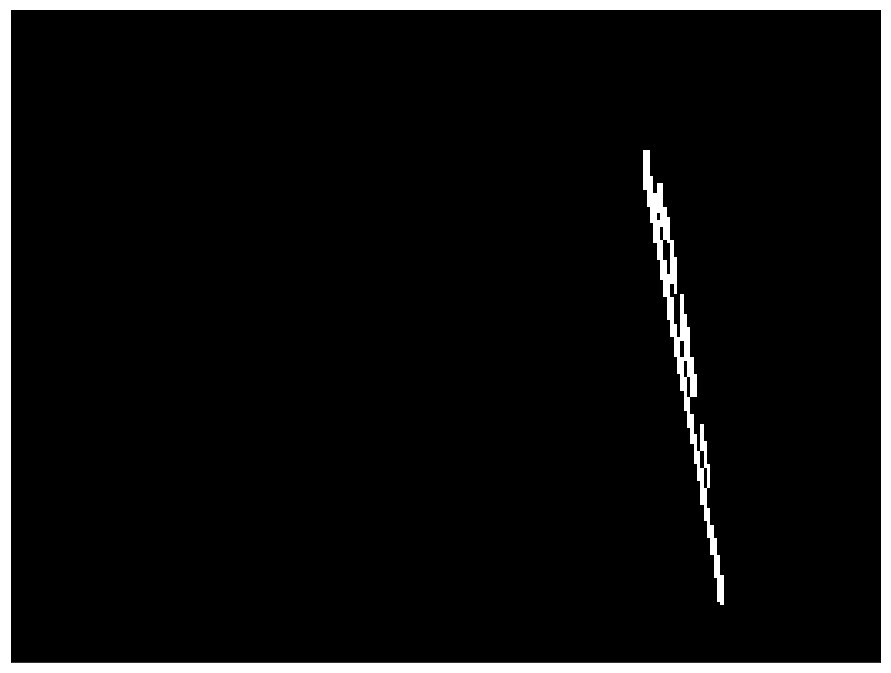

spread 5.67885117493


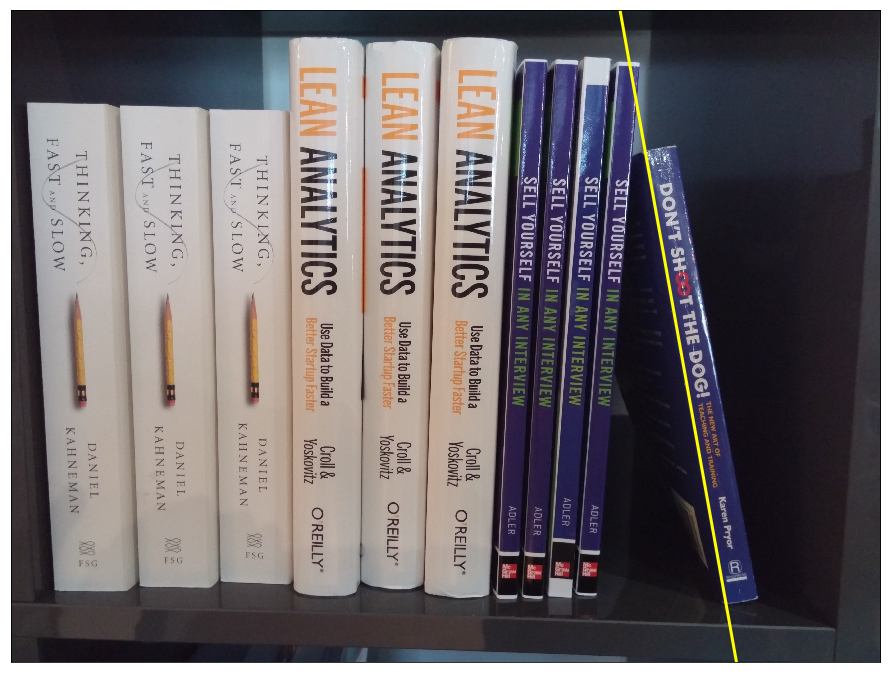

In [3]:
lines = shelfy.models.image_processing.get_book_lines(img, debug = True)